In [3]:
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
'''import scipy.integrate as integrate'''
import matplotlib.pyplot as plt
import matplotlib
import math
import statistics
import sys
import operator
import collections
import time
import pandas as pd

In [4]:
def Harvest_params(x,t,g,gam,om,xi,R,C):
    

    
    #C = xi/kappa
    #R = kappa/lam/xi
    # Assigning symbols to elements of x for ease
    q = x[0] #q is first state
    p = x[1]
    v = x[2]
    Edrive = x[3]
    Ediss = x[4]
    
    # Renaming some parameters -- but this seems like a re-write, see 25 onwards
    # lam = 1/(R*C)
    # xi = C*(xi/C)
    #Symbolic equations of motion
    dqdt = p
    dpdt = -q**3+q + g*math.cos(om*t)-2*gam*p+xi*v
    dvdt = -v/(R*C)-(xi/C)*p
    #Some other time integrals we want to compute
    dEdrive_dt = g*math.cos(om*t)*p #energy absorbed from drive
    dEdiss_dt = 2*gam*p*p # energy disspated through Gamma
#    dEC = C*v*(-lam*v-(xi/C)*p) #energy in the capacitor
    dER = v*v/R #Energy in the resistor
#    dOsc = p*(-q * q * q +  q + g * math.cos(om * t) - 2 * gam * p + xi * v) + (
#                - q * q * q + q) * p # Energy IN the oscillator
    return [dqdt,dpdt,dvdt,dEdrive_dt,dEdiss_dt, dER]

In [5]:
#function which matches efficiency with resistance and omega. rewritten so that we can input the parameeters we want

def getDrive(g,gam,om,xi,R,C):
    
    x0 = [1,0,0,0,0,0] #Initial values. Change here.
    totPoints = 100
    periods = 4 #play with this
    pointPerPeroid = totPoints/periods

    t = np.linspace(0, periods*(2*math.pi)/om, totPoints)
    def Harvest(x,t):
        return Harvest_params(x,t,g,gam,om,xi,R,C)
        
    x=odeint(Harvest,x0,t)
    numOfPoints = 99 #This is the transient number of points to be rejected right here

    q = x[:,0][numOfPoints:] #Starting FROM numOfPoints
    p = x[:,1][numOfPoints:]
    v = x[:,2][numOfPoints:]
    Edrive = x[:,3][numOfPoints:]
    Ediss = x[:,4][numOfPoints:]
    # Ecap = x[:,5][600000:]
    ER = x[:,5][numOfPoints:]
    # EOsc = x[:,7][600000:]
    eff=(Edrive-Ediss)/Edrive
    return R, om, float(Edrive) #returns omega, resistance, and efficiency

In [6]:
#getDrive(g,gam, om,  xi,       R,     C) random numbers here
getDrive(2.565, 0.02, 1,   0.05,    0.5,  0.25)

(0.5, 1, 5.723176346749088)

In [7]:
def optimization_function(Romg_arr):
    R = Romg_arr[0]
    #omega = Romg_arr[1]
    #g_amp= Romg_arr[2]
    return 1/(getDrive(2.5,0.02, 0.16,0.05,R,0.25)[2])

optimization_function(np.array([0.59]))

0.09715495123527139

In [8]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
x0=np.array([0.59]) #(res,om,g)
bnds = ((0, 2.0),(0,2.0))
res = minimize(optimization_function, x0, method='SLSQP',bounds=bnds,tol=1e-10)

In [9]:
res.x

array([0.58942114, 0.59      ])

In [10]:
getDrive(0.57,0.125, 1.3,0.2,1.2,1)

(1.2, 1.3, 1.892795640964871)

In [11]:
import tqdm
from tqdm import tqdm
res_ar=np.linspace(0.1,0.25,30)
edrive_test=[]
res_test=[]
for i in tqdm(res_ar):
    #print(i)
    edrive_test.append(1/(getDrive(2.5,0.02, 0.16,0.05,i,0.25)[2]))
    res_test.append(1/(getDrive(2.5,0.02, 0.16,0.05,i,0.25)[0]))


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.06it/s]


In [12]:
getDrive(2.5,0.02, 0.16,0.05,0.25,0.25)

(0.25, 0.16, 8.665598766244017)

In [13]:
import tqdm
from tqdm import tqdm
resopt_ar=np.linspace(0.1,0.25,30)
edrive_test2=[]
res_test2=[]
for i in tqdm(resopt_ar):
    #print(i)
    res = minimize(optimization_function, np.array([i]), method='COBYLA',bounds=((0.5, 2.25),),tol=1e-5)
    edrive_test2.append(float(res.fun))
    res_test2.append(res.x)


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]C:\Users\Eugene Surdutovich\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:539: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
  3%|██▊                                                                                | 1/30 [00:01<00:36,  1.25s/it]C:\Users\Eugene Surdutovich\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:39<00:00,  1.30s/it]


In [14]:
  #use this stuff

In [15]:
edrive_test2
#rest_single=[]
#for i in res_test2:
 #   rest_single.append(i[1])
#plt.title('Minimized $E_{drive}^{-1}$ vs $R$: (1000 data points)')
#plt.xlabel('$R$')
#plt.ylabel('$E_{drive}^{-1}$')

#plt.plot(res_ar[500:750],edrive_test[500:750])
#plt.savefig('edrive-1-op_vs_R-op-2-10.png')

[0.08120392396993022,
 0.08061067192027718,
 0.07405070429148362,
 0.08234434450173667,
 0.08234434767129796,
 0.08234436237268396,
 0.08138210887427781,
 0.08234434844478941,
 0.08272654232115784,
 0.08272652277599185,
 0.08272651088977906,
 0.08234434627539447,
 0.08272654326633067,
 0.08234434834134759,
 0.08234435779882822,
 0.08234435437046926,
 0.08234435358192896,
 0.08234434354589432,
 0.08272651883565828,
 0.08272654433649283,
 0.08272652328097385,
 0.0823443571385564,
 0.0827265182577752,
 0.08234433884384684,
 0.08234434969536279,
 0.08234437220077075,
 0.08234435586096683,
 0.08234435721875143,
 0.08234433824336916,
 0.08234435457991558]

In [16]:
ro_l

NameError: name 'ro_l' is not defined

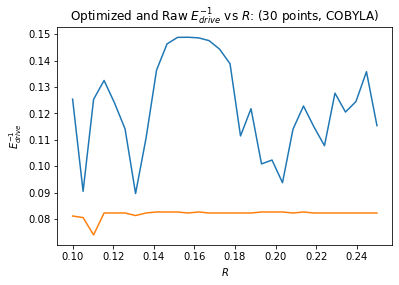

In [17]:
plt.title('Optimized and Raw $E_{drive}^{-1}$ vs $R$: (30 points, COBYLA)')
plt.xlabel('$R$')
plt.ylabel('$E_{drive}^{-1}$')
#print(edrive_test2[0])
plt.plot(res_ar,edrive_test)
plt.plot(resopt_ar,edrive_test2)

#COBYLA
#plt.savefig('edrive-1_vs_R-COB4.png')

In [27]:
np.transpose(res_test2)[0]

array([1.2724038 , 0.35351972, 1.10877843, 1.82365712, 1.82368258,
       1.82368701, 0.38311968, 1.82373216, 1.70734831, 1.70748533,
       1.70753553, 1.82377667, 1.70736705, 1.82360345, 1.82376046,
       1.82370963, 1.8236025 , 1.82375426, 1.70748723, 1.7073601 ,
       1.7074666 , 1.82369248, 1.70746596, 1.82369185, 1.82373731,
       1.82353863, 1.82385874, 1.82378688, 1.82373604, 1.82370521])

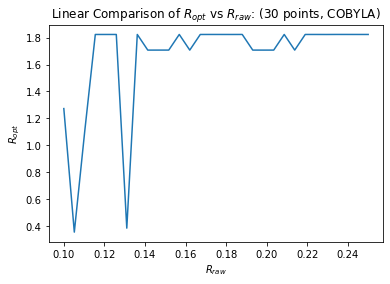

In [43]:
plt.title('Linear Comparison of $R_{opt}$ vs $R_{raw}$: (30 points, COBYLA)')
plt.xlabel('$R_{raw}$')
plt.ylabel('$R_{opt}$')
plt.plot(res_ar,ro_l)
plt.savefig('linear_res_COB4.png',bbox_inches='tight')

In [32]:
1/getDrive(2.5,0.02, 0.16,0.05,1.50,0.25)[2]

0.12266460073224048

In [33]:
ri_l, ro_l, Ed_l, Eo_l = [[], [], [], []]
for i in range(len(resopt_ar)):
    #print(i)
    ri = resopt_ar[i]
    Edrive_in = 1/(getDrive(2.5,0.02, 0.16,0.05,ri,0.25)[2])
    ropt = res_test2[i][0]
    Eopt = edrive_test2[i]
    ri_l.append(ri)
    Ed_l.append(Edrive_in)
    ro_l.append(ropt)
    Eo_l.append(Eopt)

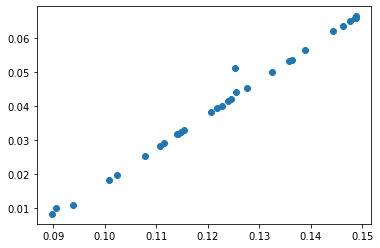

In [34]:
plt.scatter(np.array(Ed_l),np.array(Ed_l)-np.array(Eo_l))

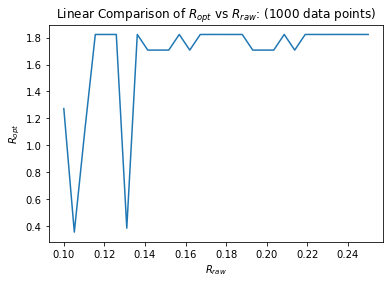

In [35]:
plt.title('Linear Comparison of $R_{opt}$ vs $R_{raw}$: (1000 data points)')
plt.xlabel('$R_{raw}$')
plt.ylabel('$R_{opt}$')
plt.plot(res_ar,ro_l)
#plt.savefig('linear_res_comparison.png')

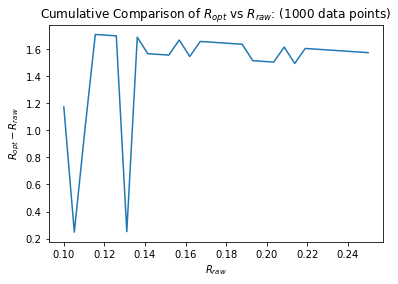

In [37]:
plt.title('Cumulative Comparison of $R_{opt}$ vs $R_{raw}$: (1000 data points)')
plt.xlabel('$R_{raw}$')
plt.ylabel('$R_{opt}-R_{raw}$')
plt.plot(res_ar,ro_l-res_ar)
plt.savefig('cumulative_res_comparison.png')